<a href="https://colab.research.google.com/github/CarlosQuark/Machine-Learning-Astrophysics/blob/main/Proyecto_Sigmoid_Redes_Cross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# PROYECTO DE MACHINE LEARNING
```



In [45]:
#librerias Comunes

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

#liberias de PCA

from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder #Change the class to str for another type the int.
from sklearn.metrics import accuracy_score, confusion_matrix



#librerias de sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#librerias de Keras y Redes Neuronales


from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical


In [46]:
data_set = pd.read_csv("star_classification.csv")
data_set.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,0.634794,5812,56354,171,GALAXY
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,0.779136,10445,58158,427,GALAXY
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,0.932346,9149,58039,775,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,0.116123,6121,56187,842,GALAXY


In [47]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  redshift     100000 non-null  float64
 14  plate        100000 non-null  int64  
 15  MJD          100000 non-null  int64  
 16  fiber_ID     100000 non-null  int64  
 17  class        100000 non-null  object 
dtypes: float64(10), int64(7),

In [48]:
enconder = LabelEncoder()

data_set["class"] = enconder.fit_transform(data_set["class"])

In [49]:
#Separar los datos

Y = np.array(data_set["class"])

df_new = data_set.drop(["class"], axis =1)

X = np.array(df_new)


In [50]:
PCA_objeto = PCA(n_components= 17)
PCA_objeto.fit(X)

PCA(n_components=17)

In [51]:
print(PCA_objeto.explained_variance_)

[1.10491489e+37 5.34345995e+28 3.63783147e+06 1.90094686e+05
 6.89069641e+04 2.22875371e+04 8.93542373e+03 3.01724592e+03
 3.23491013e+02 6.79740439e+00 3.42870277e+00 2.46778931e+00
 1.93784010e+00 4.09255753e-01 3.26988977e-01 4.66492584e-02
 3.72772496e-34]


In [52]:
PCA_objeto = PCA(n_components = 17)
Z = PCA_objeto.fit_transform(X)

In [53]:
#Entrenamiento de los datos

xtrain, xtest, ytrain, ytest = train_test_split(Z,Y, test_size = 0.2, stratify=Y)

In [54]:
#Estandarizar los datos

scaler = MinMaxScaler().fit(xtrain)

xtrain_std = scaler.transform(xtrain)

xtest_std = scaler.transform(xtest)


In [57]:
"""Este apartado se utilizar para poder dar inicio el entrenamiento a una red
neuronal

   Todo esto viene dentro de la página oficial de Keras.

   Dense es una capa de neurona que está conectada con todas las anteriores

   Sequential es utilizado para crear secuencias en redes neuronales.

   Optimizador: Adam.

   units es la candtidad de clases que tienes.

   activation: "Qué tipo de función de activación almacenas".

   input_dim = la dimensionalidad.

"""
network = Sequential([

    Dense(units=3, activation= "sigmoid" , input_dim = 17)
])

#Que copilador voy a utilizar, Adam, puede hacer eso.

Adam(learning_rate=0.0001) #Taza de aprendizaje pequeña

network.compile()

#Función de perdida que se utilizará en la sala de entrenamient como su métrica.

network.compile(loss= "categorical_crossentropy", metrics=["accuracy"])

In [58]:
"""La libreria de keras para to_categorical

   se utiliza para poder experesar problemas de clasificación de multiclase.
   Para convertir nuestras etiquetas númericas en tipo one-hot.

   Supongamso que tienes 3 clases (etiqeutas númericas 0,1,2)

   En la primera linea convierte la una matriz en one-hot

   Cada fila corresponde a un etiqueta, y cada columna, representa una clase.

   AQUÍ INICIAMOS LA ETAPA DE ENTRENAMIENTO DE LA RED

   El profe explica que es el batch_size, es para reducir el costo
   computacional,
   crea grupos para filas de hasta 100,000 dimensiones.

"""

#network.fit(xtrain_std, ytrain, epochs=50, batch_size=128 )


ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

epoch_accuracy =network.fit(xtrain_std, ytrain, epochs=1000, batch_size=80,
                             validation_data=(xtest_std,ytest))

Epoch 1/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.9645 - accuracy: 0.5936 - val_loss: 0.9338 - val_accuracy: 0.5944
Epoch 2/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.9125 - accuracy: 0.5949 - val_loss: 0.8938 - val_accuracy: 0.5958
Epoch 3/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8792 - accuracy: 0.5983 - val_loss: 0.8671 - val_accuracy: 0.6010
Epoch 4/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.8558 - accuracy: 0.6042 - val_loss: 0.8466 - val_accuracy: 0.6070
Epoch 5/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8374 - accuracy: 0.6097 - val_loss: 0.8298 - val_accuracy: 0.6104
Epoch 6/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.8215 - accuracy: 0.6141 - val_loss: 0.8148 - val_accuracy: 0.6175
Epoch 7/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8070 - accuracy: 0.6193 - val_loss: 0.8007 -

In [59]:
yhat = network.predict(xtest_std)

625/625 [==============================] - 1s 1ms/step


In [60]:
print(yhat.shape)

(20000, 3)


In [ ]:
print(ytest.shape)

(20000, 3)


In [61]:
yhat =np.argmax(yhat, axis = -1)
ytest = np.argmax(ytest, axis= -1)

In [62]:
precision = accuracy_score(ytest,yhat)
cm = confusion_matrix(ytest,yhat)
print(f"El grado de precisión de los datos son los siguientes {100*precision}")
print(cm)

El grado de precisión de los datos son los siguientes 88.26
[[11275   222   392]
 [  511  3257    24]
 [ 1194     5  3120]]


Text(0, 0.5, 'Accuracy')

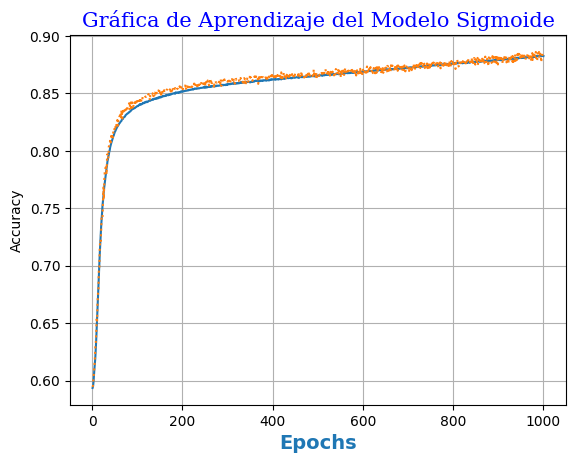

In [63]:
#Función logarítimica

#Función logarítimica

epocas = list(range(1,1001,1))

font1 = {'family':'serif','color':'blue','size':15}


fig, ax = plt.subplots()

plt.figure(1)

plt.title("Gráfica de Aprendizaje del Modelo Sigmoide", fontdict = font1)

plt.plot(epocas, epoch_accuracy.history["accuracy"])

plt.plot(epocas, epoch_accuracy.history["val_accuracy"], linestyle = "dotted")

plt.grid()

#plt.xlabel("Epochs")

ax.set_xlabel("Epochs", fontdict = {'fontsize':14, 'fontweight':'bold',
                                    'color':'tab:blue'})

plt.ylabel("Accuracy")







Text(0, 0.5, 'Accuracy')

<Figure size 640x480 with 0 Axes>

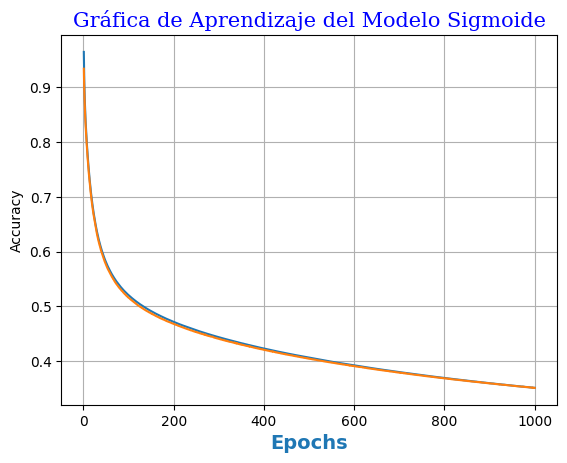

In [64]:
epocas = list(range(1,1001,1))

plt.figure(1)

fig, ax = plt.subplots()

font1 = {'family':'serif','color':'blue','size':15}

plt.title("Gráfica de Aprendizaje del Modelo Sigmoide", fontdict = font1 )

plt.plot(epocas, epoch_accuracy.history["loss"])

plt.plot(epocas, epoch_accuracy.history["val_loss"])

plt.grid()

ax.set_xlabel("Epochs", fontdict = {'fontsize':14, 'fontweight':'bold',
                                    'color':'tab:blue'})

plt.ylabel("Accuracy")

In [ ]:
#Definir un mapa de calor

import matplotlib.pyplot as plt
import seaborn as sns

# Ajusta el tamaño de la figura según tus preferencias

plt.figure(figsize=(8, 6))


sns.heatmap(xtrain_std, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)

plt.title("Mapa de calor para Datos de Entrenamiento")
plt.xlabel("Características")
plt.ylabel("Muestras")


In [ ]:
# Crear un mapa de calor para los datos de prueba


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus preferencias

sns.heatmap(xtest_std, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)

plt.title("Mapa de calor para Datos de Prueba")
plt.xlabel("Características")
plt.ylabel("Muestras")

plt.show()